In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

path = '/content/gdrive/My Drive/COLAB_Andemir/test_image.jpg' 

Mounted at /content/gdrive


In [17]:
import binascii
import struct
from PIL import Image
import numpy as np
import scipy
import scipy.misc
import scipy.cluster
from PIL import ImageColor

NUM_CLUSTERS = 5

im = Image.open(path)
im = im.resize((150, 150))      # optional, to reduce time
ar = np.asarray(im)

shape = ar.shape

ar = ar.reshape(scipy.product(shape[:2]), shape[2]).astype(float)

codes, dist = scipy.cluster.vq.kmeans(ar, NUM_CLUSTERS)

vecs, dist = scipy.cluster.vq.vq(ar, codes)         # assign codes
counts, bins = scipy.histogram(vecs, len(codes))    # count occurrences

index_max = scipy.argmax(counts)                    # find most frequent
peak = codes[index_max]
colour = binascii.hexlify(bytearray(int(c) for c in peak)).decode('ascii')
print('most frequent is #', colour)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.product is deprecated and will be removed in SciPy 2.0.0, use numpy.product instead


most frequent is # 353b4b


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: scipy.argmax is deprecated and will be removed in SciPy 2.0.0, use numpy.argmax instead


In [18]:
col = ImageColor.getrgb('#' + colour)
print(col)

(53, 59, 75)


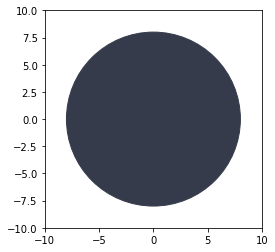

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
RGB = list(map(int, list(col)))
plt_rgb = [i/256 for i in RGB]

circle1 = plt.Circle((0, 0), 8, color=plt_rgb, fill=True)
ax.add_artist(circle1)
ag = 10
ax.set_xlim(-ag, ag)
ax.set_ylim(-ag, ag)

#  соотношение сторон
ax.set_aspect('equal') 
plt.show()